### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train_IxoE5JN.csv")

In [3]:
df

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800
94988,94989,2018-12-31 20:00:00,2461.883600
94989,94990,2018-12-31 21:00:00,2365.994400
94990,94991,2018-12-31 22:00:00,2342.942800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


### Plot of the whole data

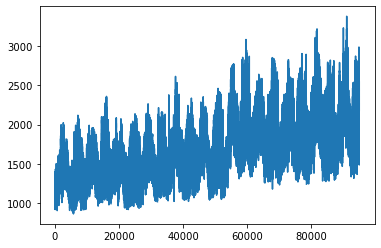

In [5]:
plt.plot(df.energy)

### Changing to proper datetime datatype

In [6]:
df.datetime=pd.to_datetime(df.datetime)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


### There are missing values

In [8]:
df[df.energy.isnull()]

,row_id,datetime,energy
92,93,2008-03-04 20:00:00,NaN
207,208,2008-03-09 15:00:00,NaN
217,218,2008-03-10 01:00:00,NaN
448,449,2008-03-19 16:00:00,NaN
519,520,2008-03-22 15:00:00,NaN
...,...,...,...
94685,94686,2018-12-19 05:00:00,NaN
94722,94723,2018-12-20 18:00:00,NaN
94737,94738,2018-12-21 09:00:00,NaN
94758,94759,2018-12-22 06:00:00,NaN


### Imputing the missing values using adjacent values

In [9]:
for i in df[df.energy.isnull()].index:
    df.loc[i,'energy']=(df.iloc[i-1,2]+df.iloc[i-1,2])/2
df

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800
94988,94989,2018-12-31 20:00:00,2461.883600
94989,94990,2018-12-31 21:00:00,2365.994400
94990,94991,2018-12-31 22:00:00,2342.942800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    94992 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [11]:
df.drop(['row_id'],axis=1,inplace=True)

In [12]:
df

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500
...,...,...
94987,2018-12-31 19:00:00,2528.446800
94988,2018-12-31 20:00:00,2461.883600
94989,2018-12-31 21:00:00,2365.994400
94990,2018-12-31 22:00:00,2342.942800


### Plotting the last 2000 observations to see the graph more clearly

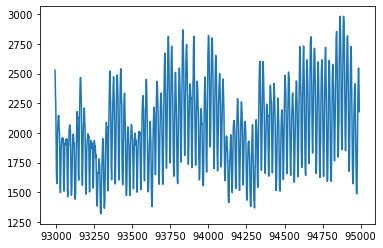

In [13]:
plt.plot(df.energy[-2000:])

### Changing the index to datetime

In [14]:
df.index=df.datetime

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### removing the datetime column which is redundant now

In [16]:
df.drop(['datetime'],axis=1,inplace=True)

### Moving average of 24

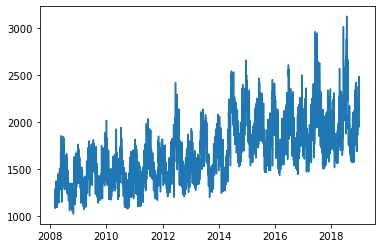

In [17]:
plt.plot(df.energy.rolling(24).mean())

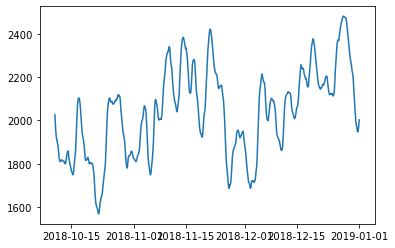

In [18]:
plt.plot(df.energy[-2000:].rolling(24).mean())

### Apart from a daily seasonality there seems to be an yearly seasonality as well

### Dickey Fuller Test

In [19]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.energy, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -9.218571e+00
p-value                        1.805724e-15
#Lags Used                     6.700000e+01
Number of Observations Used    9.492400e+04
Critical Value (1%)           -3.430419e+00
Critical Value (5%)           -2.861570e+00
Critical Value (10%)          -2.566786e+00
dtype: float64


### The dataset is stationary with a very high level of confidence

### Taking seasonal differencing with a seasonality of 24. A trend differencing is also done on top of that for analyzing the data

In [20]:
df['seasonal_diff']=df.energy-df.energy.shift(24)
df['seasonal_1st_df']=df.seasonal_diff-df.seasonal_diff.shift()

### Plotting the graphs for the differenced data

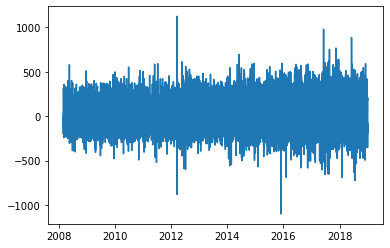

In [21]:
plt.plot(df['seasonal_diff'])

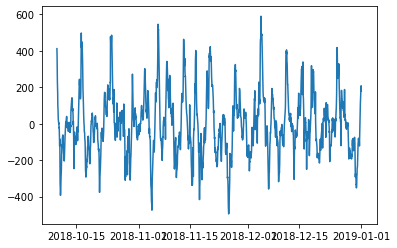

In [22]:
plt.plot(df['seasonal_diff'][-2000:])

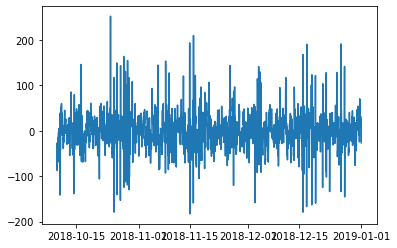

In [23]:
plt.plot(df['seasonal_1st_df'][-2000:])

### Auto correlation of the original data

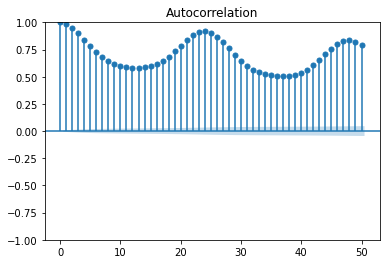

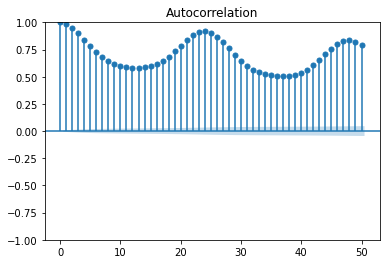

In [24]:
plot_acf(df.energy)

### A seasonality of 24 is obvious from this graph

### PACF

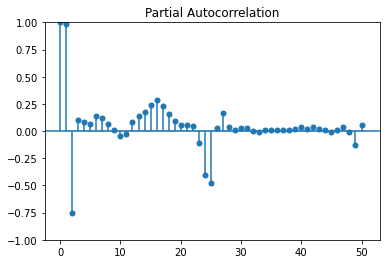

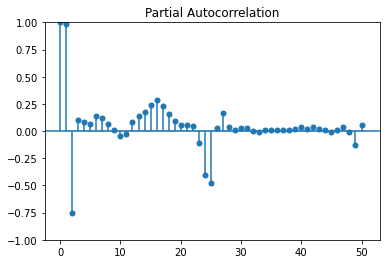

In [25]:
plot_pacf(df.energy)

### negative correlation can be seen as 23,24 and 25 lg

### ACF and PACF of the seasonlly differenced data

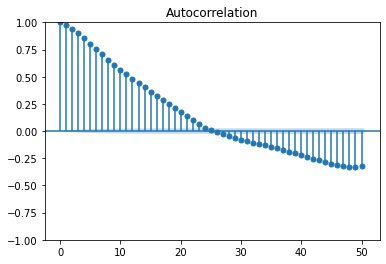

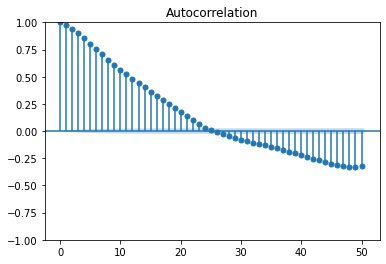

In [26]:
plot_acf(df['seasonal_diff'][24:])

###  negative correlation after lag 24 is observed

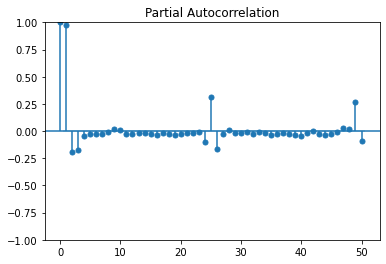

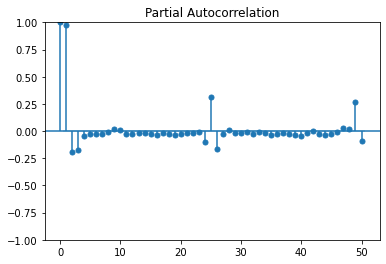

In [27]:
plot_pacf(df['seasonal_diff'][24:])

### At lag 9 correlation become insignificant, lag 25,27 show negative correlation, lag 26 show positive correlation

### ACF and PACF of the trend differenced data of the seasonally differenced data

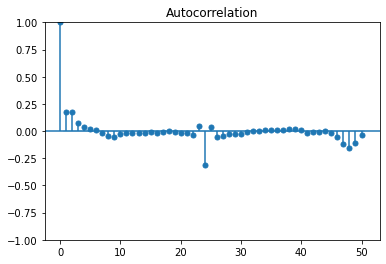

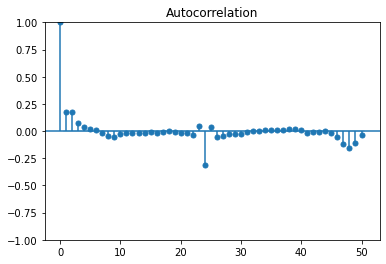

In [28]:
plot_acf(df['seasonal_1st_df'][25:])

### Negative correlation at lag 24, correlaation become insignificant at 5

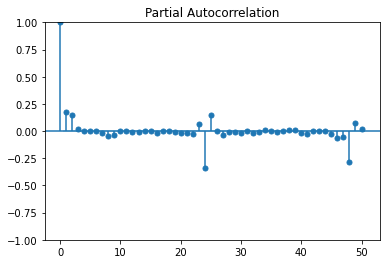

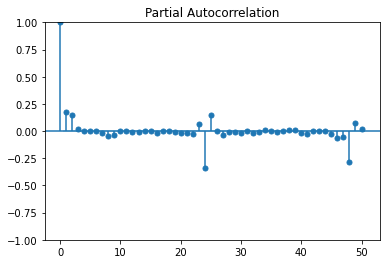

In [29]:
plot_pacf(df['seasonal_1st_df'][25:])

### Correlation become insignificant at lag 3, lag 24 shows negative correlation

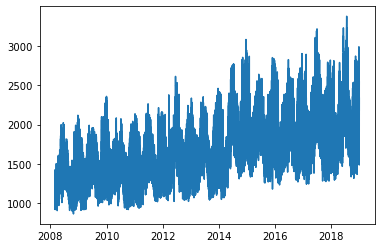

In [30]:
plt.plot(df.energy)

### There is a significant uward trend at around the halfway mark of 2014. Taking the data from 2015 onwards.

In [31]:
df2=df[-35040:]

In [32]:
df2

,energy,seasonal_diff,seasonal_1st_df
datetime,,,
2015-01-02 00:00:00,2100.6056,-186.6732,35.4316
2015-01-02 01:00:00,1955.8744,-164.6380,22.0352
2015-01-02 02:00:00,1846.1992,-169.7712,-5.1332
2015-01-02 03:00:00,1773.0824,-166.8916,2.8796
2015-01-02 04:00:00,1756.0552,-129.3316,37.5600
...,...,...,...
2018-12-31 19:00:00,2528.4468,164.2256,31.2356
2018-12-31 20:00:00,2461.8836,175.9560,11.7304
2018-12-31 21:00:00,2365.9944,185.0948,9.1388


### Loading the dataset for submission

In [33]:
sub=pd.read_csv("test_WudNWDM.csv")
sub

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
...,...,...
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00


In [34]:
sub.drop(['datetime'],axis=1,inplace=True)

### Building a model using SARIMA. data from 2015 is used for training

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sar=SARIMAX(df2.energy,trend='n',order=(3,0,3),seasonal_order=(3,1,3,24))
fore=sar.fit(low_memory=True)

C:\Users\Govind S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Govind S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Govind S\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
forecast=fore.forecast(26304)

In [37]:
forecast.index=range(26304)
sub['energy']=forecast
sub

,row_id,energy
0,94993,1996.659220
1,94994,1853.860002
2,94995,1748.453195
3,94996,1680.286768
4,94997,1636.657369
...,...,...
26299,121292,2596.880517
26300,121293,2514.878279
26301,121294,2423.245757
26302,121295,2381.052227


### preparing file for submission

In [38]:
sub.to_csv('submission_15.csv',index=False)